In [75]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import  display,Audio
plt.rcParams.update({'font.size': 15})

In [68]:
EXP_NAME = 'BASELINE-crua-3'
path = '/code/env202305/results/' + EXP_NAME + '/HM-Conformer'

## Dataset

In [73]:
train = pd.read_csv('/data/ASVspoof2024/metadata_trn.txt', sep=' ', names=['Spk_ID', 'File', 'Gender', 'Codec', 'Attack_ID', 'Label'])
train['File'] = train['File'].apply(lambda x: '/data/ASVspoof2024/train/' + x + '.flac')
train

Spk_ID                                             File Gender Codec  \
0       T_5033  /data/ASVspoof2024/train/flac/T_0000079616.flac      M     -   
1       T_4203  /data/ASVspoof2024/train/flac/T_0000070600.flac      F     -   
2       T_1365  /data/ASVspoof2024/train/flac/T_0000137385.flac      F     -   
3       T_4011  /data/ASVspoof2024/train/flac/T_0000036916.flac      M     -   
4       T_1117  /data/ASVspoof2024/train/flac/T_0000031508.flac      M     -   
...        ...                                              ...    ...   ...   
182352  T_5331  /data/ASVspoof2024/train/flac/T_0000155035.flac      F     -   
182353  T_3342  /data/ASVspoof2024/train/flac/T_0000043042.flac      M     -   
182354  T_2193  /data/ASVspoof2024/train/flac/T_0000179011.flac      F     -   
182355  T_1616  /data/ASVspoof2024/train/flac/T_0000166947.flac      F     -   
182356  T_5033  /data/ASVspoof2024/train/flac/T_0000106514.flac      M     -   

       Attack_ID     Label  
0            A07     spoof  
1            A03     spoof  
2            A06     spoof  
3            A08     spoof  
4            A04     spoof  
...          ...       ...  
182352       A05     spoof  
182353       A01     spoof  
182354       A07     spoof  
182355  bonafide  bonafide  
182356       A01     spoof  

[182357 rows x 6 columns]

### Spectrogramas

### Listening

In [80]:
N_per_atk = 2
for atk_id in train.Attack_ID.unique():
    print('--- ', atk_id, ' ---')
    sub_df = train[train['Attack_ID']==atk_id]
    for i in range(N_per_atk):
        display(Audio(sub_df.iloc[i]['File']))

---  A07  ---


---  A03  ---


---  A06  ---


---  A08  ---


---  A04  ---


---  bonafide  ---


---  A01  ---


---  A05  ---


---  A02  ---


## Training Specs

### Learning Rate

Text(0.5, 0, 'Epoch')

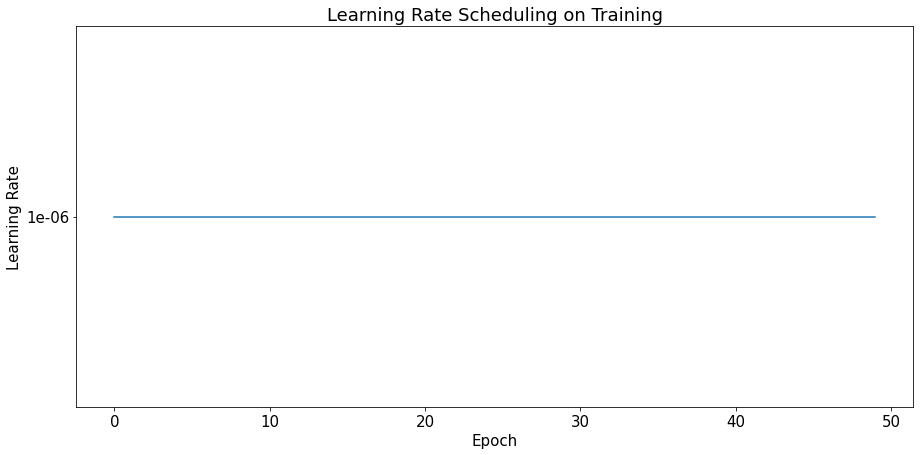

In [36]:
with open(os.path.join(path, 'LR.txt'), 'r') as f:
    lrs = [line.rstrip().split(' ')[-1][1:-1] for line in f]
plt.figure(figsize=(15,7))
plt.plot(lrs)
plt.title('Learning Rate Scheduling on Training')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')

### Losses

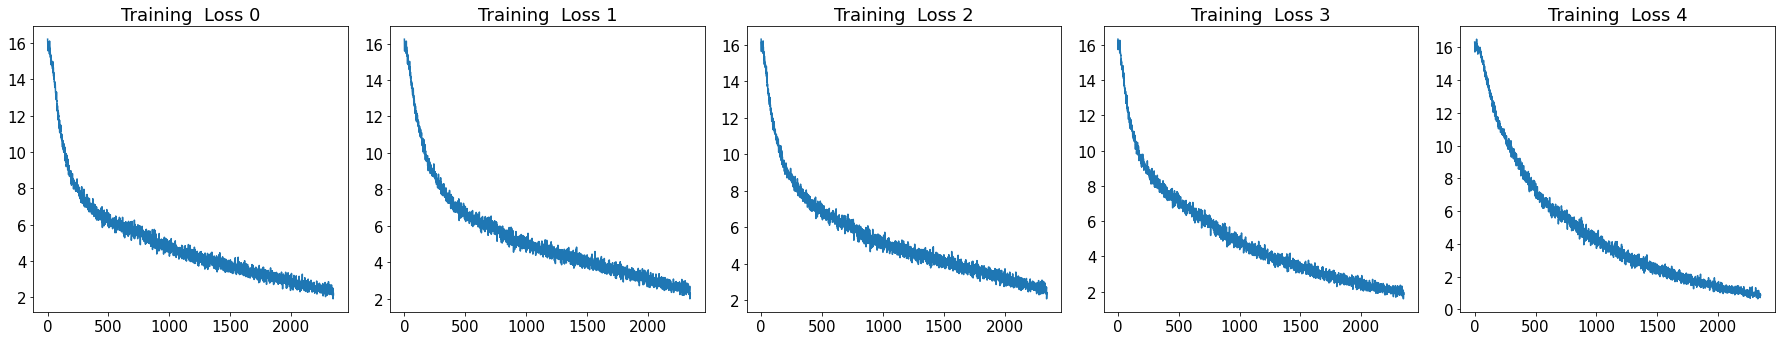

In [52]:
# Create a figure and subplots
fig, axs = plt.subplots(1,5, figsize=(25, 5))

# Iterate over each subplot
for i in range(5):
    with open(os.path.join(path, 'Loss'+str(i)+'.txt'), 'r') as f:
        loss = [float(line.rstrip().split(' ')[-1]) for line in f]
    axs[i].plot(loss, label=f'Plot {i}')
    axs[i].set_title(f'Training  Loss {i}')
plt.tight_layout()


### Total Loss

Text(0.5, 1.0, 'Total Training Loss')

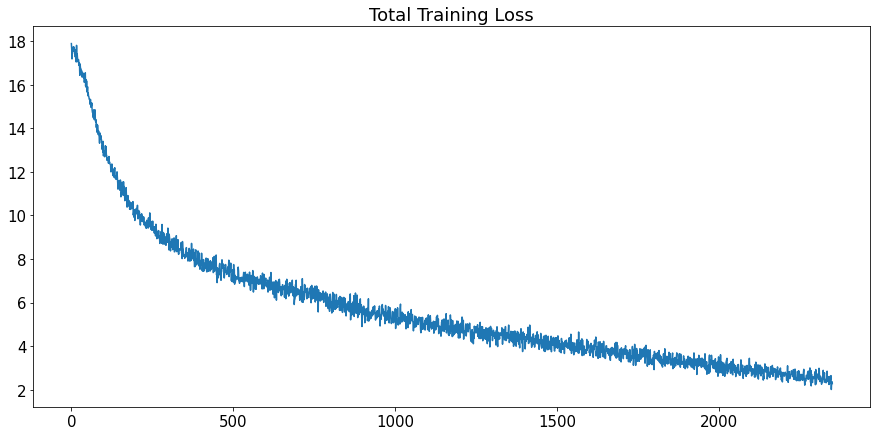

In [79]:
with open(os.path.join(path, 'Loss.txt'), 'r') as f:
    totloss = [float(line.rstrip().split(' ')[-1]) for line in f]
plt.figure(figsize=(15,7))
plt.plot(totloss)
plt.title('Total Training Loss')


### EER

Text(0.5, 0, 'Epoch')

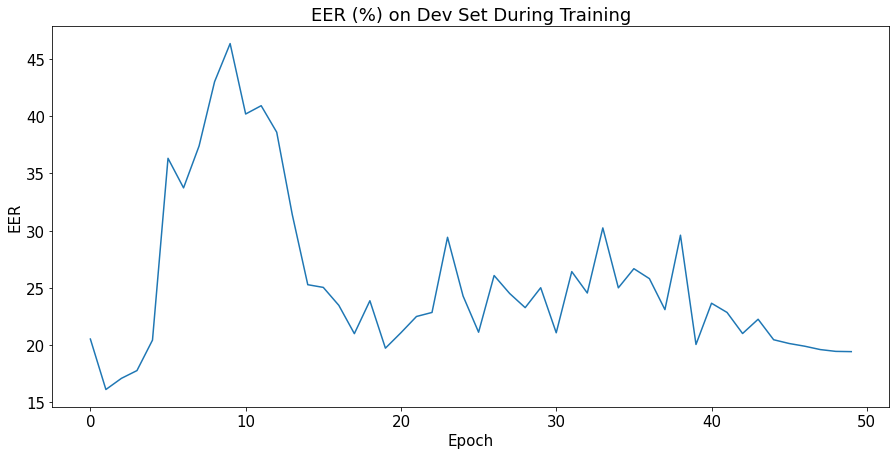

In [38]:
with open(os.path.join(path, 'Dev-EER-repo.txt'), 'r') as f:
    eers = [float(line.rstrip().split(' ')[-1]) for line in f]
plt.figure(figsize=(15,7))
plt.plot(eers)
plt.title('EER (%) on Dev Set During Training')
plt.ylabel('EER')
plt.xlabel('Epoch')

### DCF

Text(0.5, 0, 'Epoch')

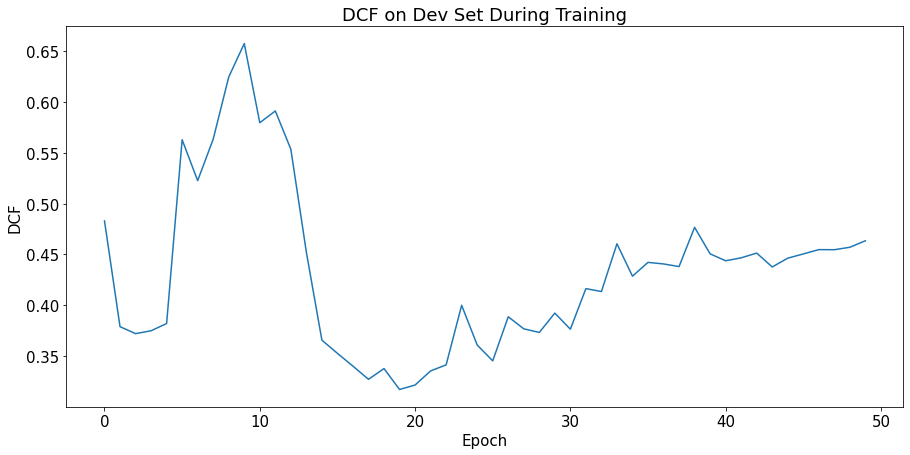

In [39]:
with open(os.path.join(path, 'Dev-DCF.txt'), 'r') as f:
    dcfs = [float(line.rstrip().split(' ')[-1]) for line in f]
plt.figure(figsize=(15,7))
plt.plot(dcfs)
plt.title('DCF on Dev Set During Training')
plt.ylabel('DCF')
plt.xlabel('Epoch')

### CLLR

Text(0.5, 0, 'Epoch')

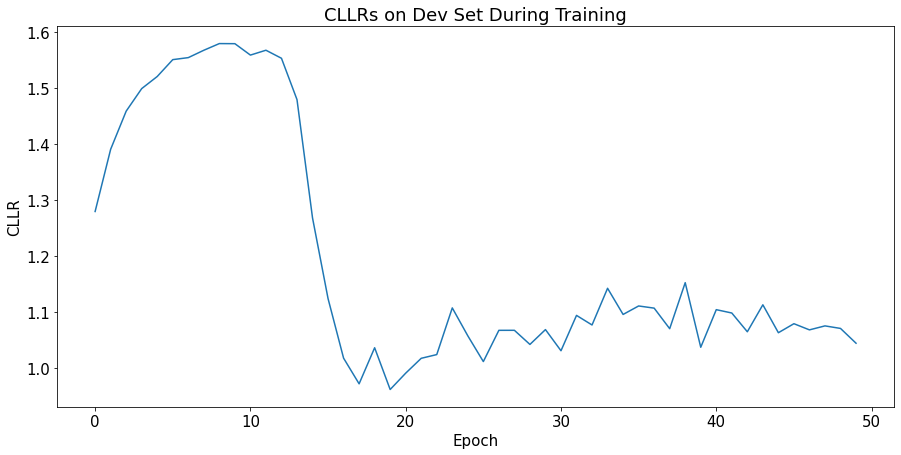

In [40]:
with open(os.path.join(path, 'Dev-CLLR.txt'), 'r') as f:
    cllrs = [float(line.rstrip().split(' ')[-1]) for line in f]
plt.figure(figsize=(15,7))
plt.plot(cllrs)
plt.title('CLLRs on Dev Set During Training')
plt.ylabel('CLLR')
plt.xlabel('Epoch')

## Dev Analysis

### Metrics per Attack

#### DCF

#### EER

#### CLLR

### Metrics per Gender

#### DCF

#### EER

#### CLLR

### Metrics for Silence

### Metrics for Non Silence

### DCF Calibration